In [20]:
import polars as pl
import matplotlib.pyplot as plt

FILE_PATH = "../csv_files/processed_small_dataset.csv"

In [21]:
df = pl.read_csv(FILE_PATH)
df = df.drop_nulls(subset=["duration", "genre_top"])
df = df.drop_nans(subset=["duration"])
df["duration"]

duration
i64
168
237
206
161
207
…
38
162
217


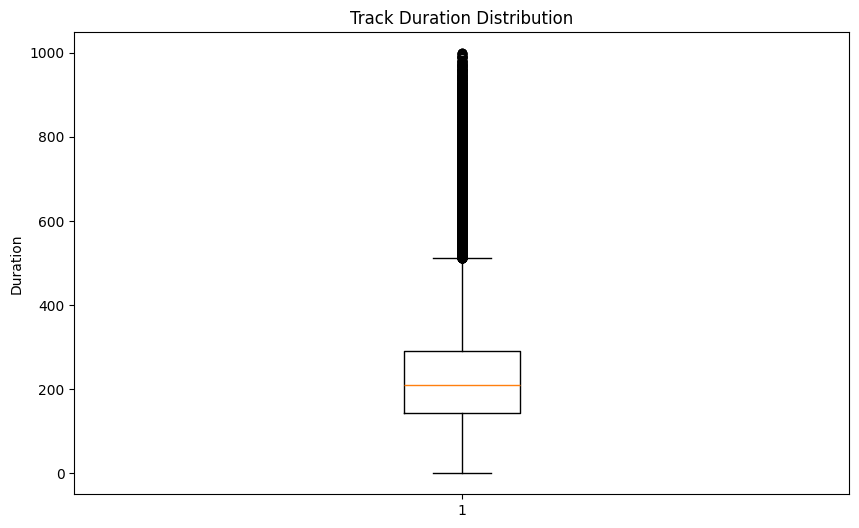

In [22]:
durations = (
    df
    .filter(pl.col("duration") < 1000)
    .select("duration")
    .to_series()
    .to_list()
)

plt.figure(figsize=(10, 6))
plt.boxplot(durations)

plt.ylabel("Duration")
plt.title("Track Duration Distribution")
plt.show()

In [23]:
grouped = df.group_by("duration").agg(
        pl.col("track_id").count(),
    )

grouped = grouped.filter(pl.col("track_id") > 100)

grouped

duration,track_id
i64,u32
15,153
268,146
149,146
161,157
271,110
…,…
131,169
110,149
119,119


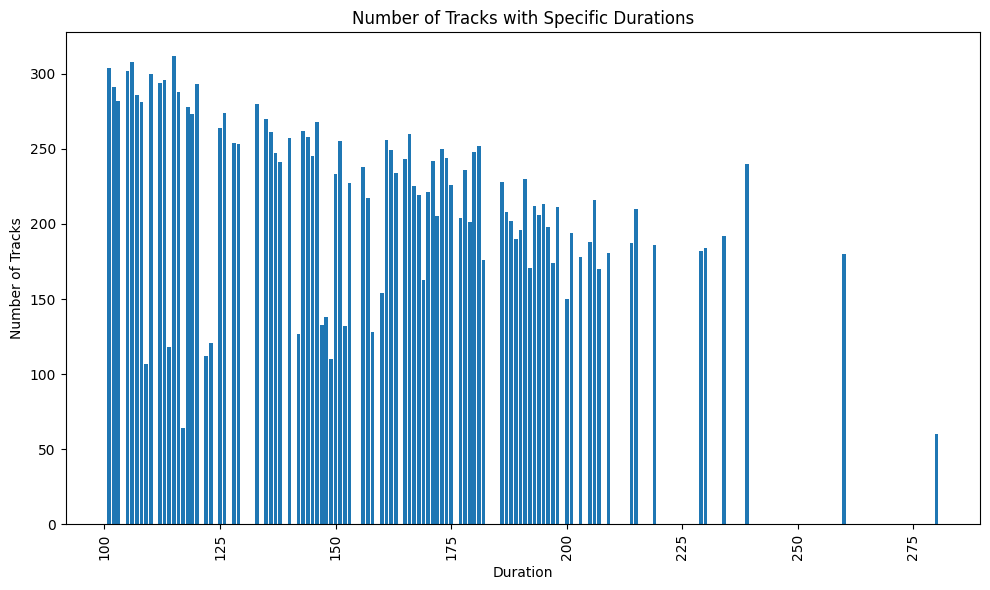

In [ ]:
# Extract columns as lists directly from Polars
counts = grouped["track_id"].to_list()
duration = grouped["duration"].to_list()

# Plot
plt.figure(figsize=(10,6))
plt.bar(duration, counts)
plt.xticks(rotation=90)
plt.xlabel("Duration")
plt.ylabel("Number of Tracks")
plt.title("Number of Tracks with Specific Durations")
plt.tight_layout()
plt.show()

In [30]:
genre_grouped = df.group_by("genre_top").agg(
        pl.col("duration").mean()
    )

genre_grouped

genre_top,duration
str,f64
"""Hip-Hop""",202.759572
"""Rock""",225.497109
"""Spoken""",590.867612
"""Old-Time / Historic""",184.303249
"""International""",300.023758
…,…
"""Experimental""",362.668458
"""Pop""",188.661664
"""Electronic""",263.7707


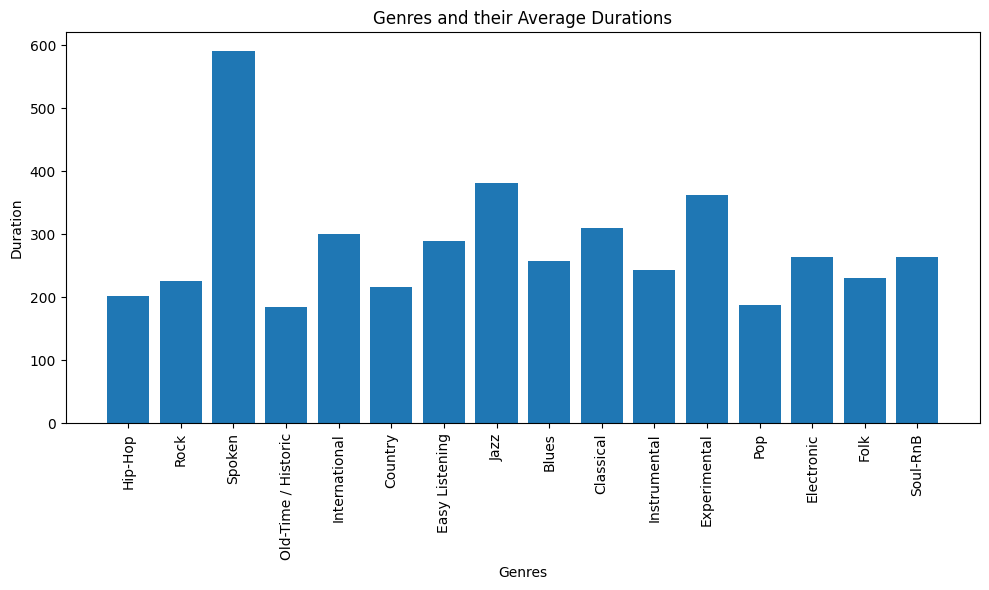

In [31]:
# Extract columns as lists directly from Polars
genres = genre_grouped["genre_top"].to_list()
duration = genre_grouped["duration"].to_list()

# Plot
plt.figure(figsize=(10,6))
plt.bar(genres, duration)
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Duration")
plt.title("Genres and their Average Durations")
plt.tight_layout()
plt.show()